<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/georeferencedFrequentPattern/basic/SpatialECLAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Spatial Frequent patterns in Big Data Using SpatialECLAT Algorithm

In this tutorial, we will discuss two approaches to find Spatial Frequent patterns in big data using SpatialECLAT algorithm.

1. [__Basic approach:__](#basicApproach) Here, we present the steps to discover Spatial Frequent patterns using a single minimum support value
2. [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Spatial Frequent patterns using multiple minimum support values.

***

## <a id='basicApproach'>Basic approach: Executing SpatialECLAT on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.9/883.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 90.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 19.1 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=49923520f981dce02492dc9ac153bb38529874f2ef70e6508122b8e72f2b79a0
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=3072f30e6368df90736548277d80d845c072421edc60d98cf29a8c9f615414d4
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


#### Step 1: Import the SpatialECLAT algorithm

In [2]:
from PAMI.georeferencedFrequentPattern.basic import SpatialECLAT  as alg

#### Step 2: Specify the following input parameters

In [3]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.
neighborFile='t10_neighbours.txt'
seperator='\t'

#### Step 3: Execute the SpatialECLAT algorithm

In [4]:
obj = alg.SpatialECLAT(iFile=inputFile, minSup=minimumSupportCount,nFile=neighborFile, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [6]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [7]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [8]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 797


##### Step 5.2: Runtime consumed by the mining algorithm

In [9]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 6.8010571002960205


In [10]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 247427072
Memory (USS): 223440896


# Advanced Tutorial on Implementing SpatialECLAT Algorithm

***

#### Step 1: Import the SpatialECLAT algorithm and pandas data frame

In [12]:
from PAMI.georeferencedFrequentPattern.basic import SpatialECLAT  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [13]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
neighborFile='t10_neighbours.txt'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of SpatialECLAT algorithm

#### Step 3: Execute the SpatialECLAT algorithm using a for loop

In [14]:
algorithm = 'SpatialECLAT'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.SpatialECLAT('https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv', minSup=minSupCount,nFile=neighborFile, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm
Spatial Frequent patterns were generated successfully using SpatialECLAT algorithm


In [15]:
print(result)

      algorithm  minSup  patterns   runtime     memory
0  SpatialECLAT     100       797  8.144230  346574848
1  SpatialECLAT     150       766  8.228087  347447296
2  SpatialECLAT     200       741  7.877745  347795456
3  SpatialECLAT     250       717  7.635191  348323840
4  SpatialECLAT     300       692  7.310039  348454912


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

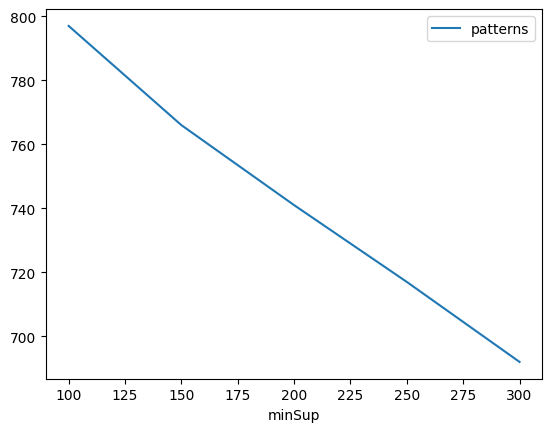

Graph for No Of Patterns is successfully generated!


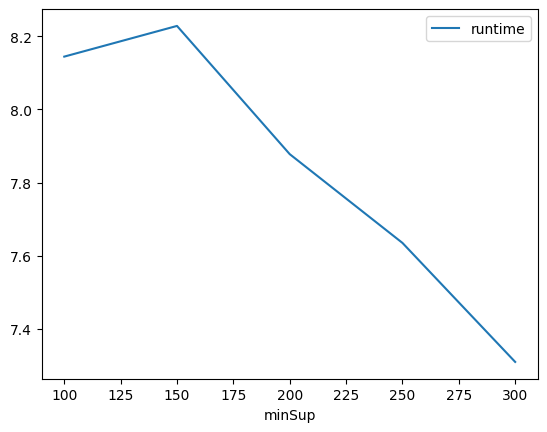

Graph for Runtime taken is successfully generated!


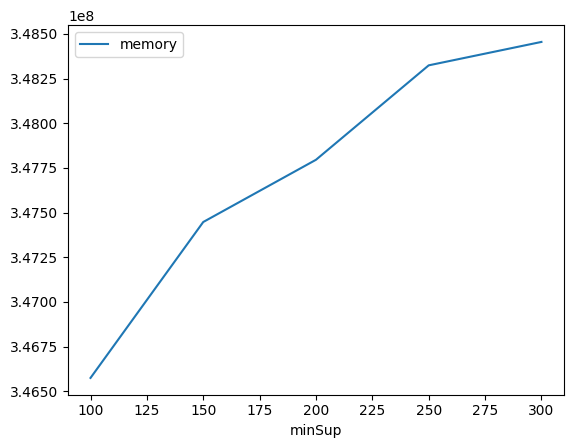

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [18]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
